In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from glob import glob

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [2]:
i = 0
pic_path = []
labels = []
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        temp = dirname.split('\\')
        pic_path.append(os.path.join(dirname, filename))
        labels.append(temp[1])

In [3]:
images = []
print(len(labels))
print(len(pic_path))
for path in pic_path:
    img = load_img(path, target_size=(100,100))
    img = img_to_array(img, dtype=np.uint8)
    images.append(img)

2188
2188


In [4]:
images = np.array(images)

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

images.shape, labels.shape

((2188, 100, 100, 3), (2188,))

In [5]:
CLASSES = label_encoder.classes_.tolist()
CLASSES

['paper', 'rock', 'scissors']

In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=1)
X_train.shape, y_train.shape

((1969, 100, 100, 3), (1969,))

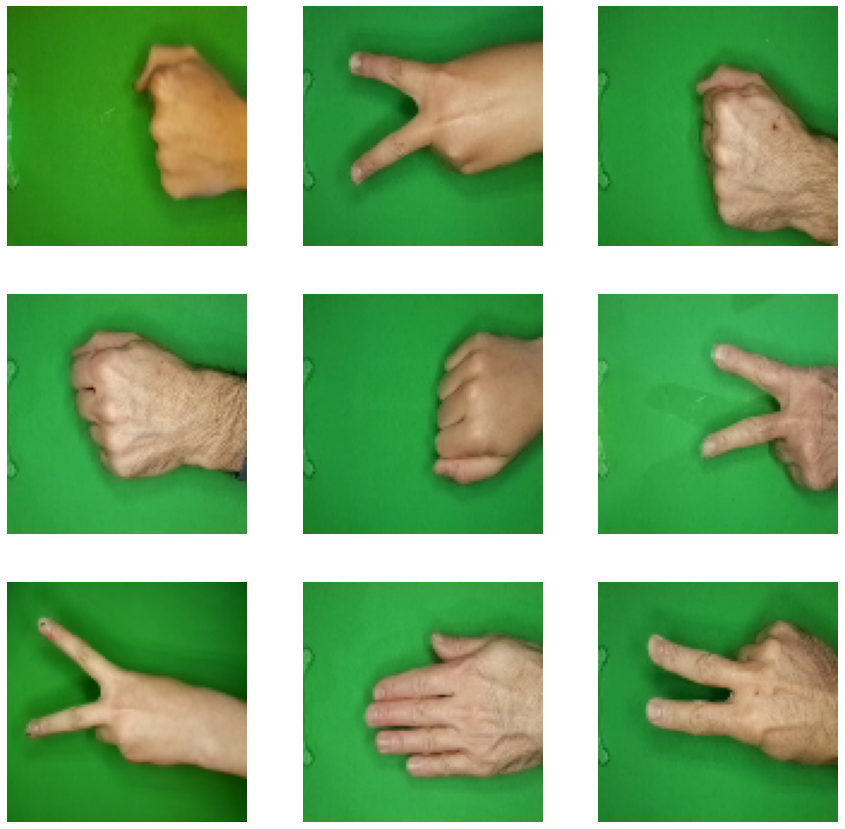

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs = np.ravel(axs)

for i in range(len(axs)):
    plt.sca(axs[i])
    plt.imshow(X_train[i])
    plt.axis('off')
    
plt.show()

In [10]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

In [12]:
tf.random.set_seed(10)

model = Sequential([
    Conv2D(256, 3, padding='same', activation='relu', input_shape=X_train[0].shape),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu', input_shape=X_train[0].shape),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu', input_shape=X_train[0].shape),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu', input_shape=X_train[0].shape),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, 'relu'),
    Dropout(0.5),
    Dense(256, 'relu'),
    Dropout(0.2),
    Dense(3, 'softmax')
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_oh, batch_size=32, epochs=10, validation_data=(X_test_scaled, y_test_oh))

Epoch 1/10
62/62 [==============================] - 398s 6s/step - loss: 1.8594 - accuracy: 0.7197 - val_loss: 1.2275 - val_accuracy: 0.5023
Epoch 2/10
62/62 [==============================] - 400s 6s/step - loss: 0.3949 - accuracy: 0.9116 - val_loss: 1.0374 - val_accuracy: 0.5342
Epoch 3/10
62/62 [==============================] - 399s 6s/step - loss: 0.2004 - accuracy: 0.9507 - val_loss: 1.7304 - val_accuracy: 0.3699
Epoch 4/10
62/62 [==============================] - 400s 6s/step - loss: 0.1140 - accuracy: 0.9721 - val_loss: 1.0711 - val_accuracy: 0.6301
Epoch 5/10
62/62 [==============================] - 399s 6s/step - loss: 0.1613 - accuracy: 0.9660 - val_loss: 0.8803 - val_accuracy: 0.7443
Epoch 6/10
62/62 [==============================] - 401s 6s/step - loss: 0.0717 - accuracy: 0.9822 - val_loss: 0.5452 - val_accuracy: 0.8082
Epoch 7/10
62/62 [==============================] - 398s 6s/step - loss: 0.0995 - accuracy: 0.9792 - val_loss: 0.8990 - val_accuracy: 0.7626
Epoch 8/10
62

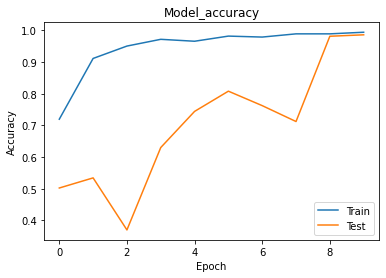

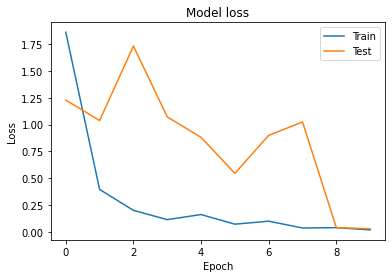

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [19]:
predictions = model.predict(X_test_scaled).argmax(axis=1)
predictions

array([2, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 2, 0, 1,
       0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0,
       2, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0,
       1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2],
      dtype=int64)

In [18]:
confusion_matrix(y_test, predictions)

array([[69,  2,  0],
       [ 0, 74,  0],
       [ 1,  0, 73]], dtype=int64)